# Clase VII curso 2020-2021. Emanuele Schiavi
### Ejemplo 7.1: Aproximacion lineal y cuadratica 
Definir funcion, calcular un polinomio aproximante de taylor en un punto, calcular el error cometido, representar

In [1]:
!git clone https://github.com/rollervan/FunMat.git temp
!cp -r ./temp/Codes/Images ./
!cp -r ./temp/utils ./
!rm -rf ./temp

Cloning into 'temp'...
remote: Enumerating objects: 179, done.
remote: Counting objects: 100% (179/179), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 179 (delta 57), reused 161 (delta 41), pack-reused 0
Receiving objects: 100% (179/179), 17.23 MiB | 4.19 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from sympy import *
from sympy.matrices.expressions.factorizations import svd
from scipy.linalg import lu
from IPython.display import Math, display, Latex
import time

In [3]:
from sympy import series

x = symbols('x')
f = (x**3 - x)*exp(-x)

p1 = series(f, x, 0, 2).removeO() # .removeO() elimina los términos de Orden para así poder evaluar la función
p2 = series(f, x, 0, 3).removeO()

x_0 = 0.1
exacto = f.subs(x, x_0)
print('Exacto')
display(exacto)

print('Aproximación Lineal')
L = p1.subs(x, x_0)
display(L)

print('Aproximación Cuadrática')
C = p2.subs(x, x_0)
display(C)

error_L = abs(exacto-L)/abs(exacto) # error lineal
error_C = abs(exacto-C)/abs(exacto) # error cuadratico

print('Error Lineal')
display(error_L)

print('Error Cuadrático')
display(error_C)

Exacto


-0.0895789043855600

Aproximación Lineal


-0.100000000000000

Aproximación Cuadrática


-0.0900000000000000

Error Lineal


0.116334260682472

Error Cuadrático


0.00470083461422503

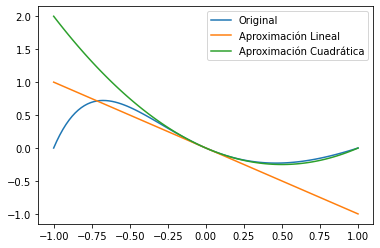

In [4]:
x_ = np.linspace(-1,1,100)
plt.plot(x_, lambdify(x,f)(x_))
plt.plot(x_, lambdify(x,p1)(x_))
plt.plot(x_, lambdify(x,p2)(x_))
plt.legend(['Original', 'Aproximación Lineal', 'Aproximación Cuadrática'])
plt.show()

### Cálculo Puntos Críticos y Óptimos

In [5]:
x = symbols('x')
f = (x**2 - 2*x + 1)/(x**2 + 1)
print('Función f(x)')
display(f)
df = diff(f)
print('Derivada f\'(x)')
display(df)

# Puntos críticos
pcrit = solve(df)
print('Puntos críticos')
display(pcrit)

# Extremos relativos
ddf=diff(df)
print('Derivada segunda f\'\'(x)')
display(ddf)

CD1 = ddf.subs(x, pcrit[0]) # Criterio Derivada Segunda
print('Criterio Derivada Segunda, punto 1')
display(CD1)

CD2 = ddf.subs(x, pcrit[1]) # Criterio Derivada Segunda
print('Criterio Derivada Segunda, punto 2')
display(CD2)

# Posibles puntos de inflexión
inflex=solve(ddf)
print('Posibles puntos de inflexión')
display(inflex)

Función f(x)


(x**2 - 2*x + 1)/(x**2 + 1)

Derivada f'(x)


-2*x*(x**2 - 2*x + 1)/(x**2 + 1)**2 + (2*x - 2)/(x**2 + 1)

Puntos críticos


[-1, 1]

Derivada segunda f''(x)


8*x**2*(x**2 - 2*x + 1)/(x**2 + 1)**3 - 4*x*(2*x - 2)/(x**2 + 1)**2 + 2/(x**2 + 1) - 2*(x**2 - 2*x + 1)/(x**2 + 1)**2

Criterio Derivada Segunda, punto 1


-1

Criterio Derivada Segunda, punto 2


1

Posibles puntos de inflexión


[0, -sqrt(3), sqrt(3)]

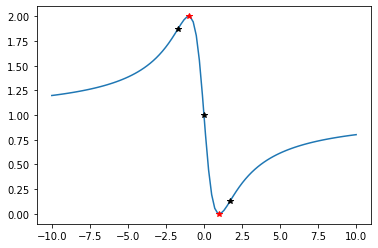

In [6]:
f_np = lambdify(x, f)
f_np(pcrit[0])
x_ = np.linspace(-10,10,100)
plt.plot(x_, f_np(x_))
plt.plot(pcrit[0], f_np(pcrit[0]), 'r*')
plt.plot(pcrit[1], f_np(pcrit[1]), 'r*')
plt.plot(inflex[0], f_np(inflex[0]), 'k*')
plt.plot(inflex[1], f_np(inflex[1]), 'k*')
plt.plot(inflex[2], f_np(inflex[2]), 'k*')
plt.show()

### Caso no lineal

In [7]:
x, y = symbols('x, y')
# X = Matrix([x, y])
# display(X)
f = log(x**2 + y**2 + 1)
display(f)

# Calculo el gradiente
fx = diff(f, x)
print('fx')
display(fx)
fy = diff(f, y)
print('fy')
display(fy)

# Calculo los puntos criticos
xcr = solve(fx)
ycr = solve(fy)
display(xcr)
display(ycr)

log(x**2 + y**2 + 1)

fx


2*x/(x**2 + y**2 + 1)

fy


2*y/(x**2 + y**2 + 1)

[{x: 0}]

[{y: 0}]

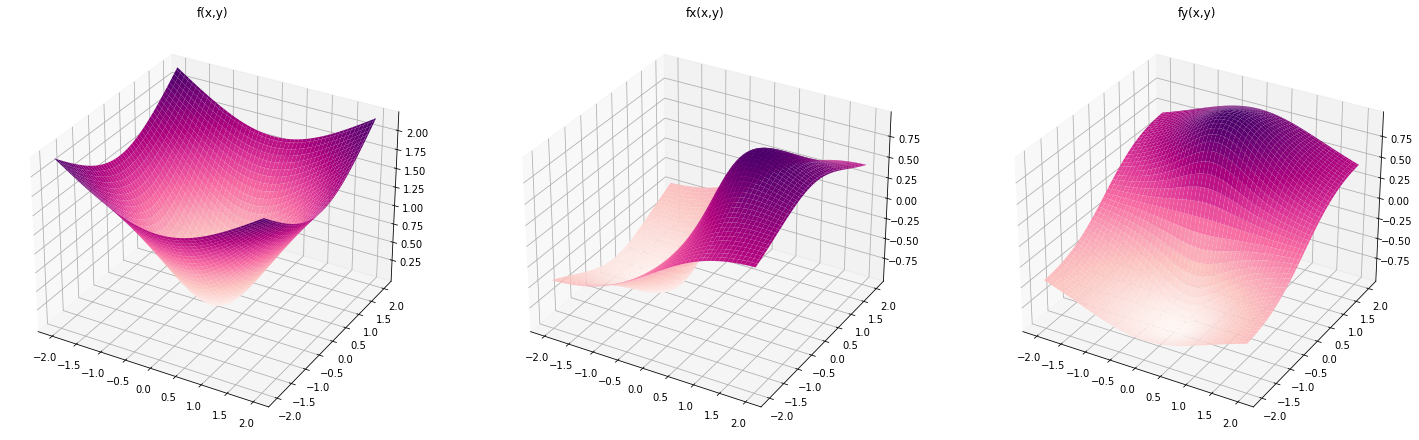

In [8]:
X, Y = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
f_np = lambdify((x, y), f)
fx_np = lambdify((x, y), fx)
fy_np = lambdify((x, y), fy)

fig, axs = plt.subplots(1,3,subplot_kw={"projection": "3d"}, figsize=(30,10))
axs[0].plot_surface(X, Y, f_np(X, Y), cmap='RdPu')
axs[0].set_title('f(x,y)')
axs[1].plot_surface(X, Y, fx_np(X, Y), cmap='RdPu')
axs[1].set_title('fx(x,y)')
axs[2].plot_surface(X, Y, fy_np(X, Y), cmap='RdPu')
axs[2].set_title('fy(x,y)')

plt.show()

### Funciones y curvas de nivel
Representar campo vectorial de gradientes: simbolico

In [9]:
x, y, p1, p2 = symbols('x, y, p1, p2')

z = x*exp(-x**2 - y**2)
print('Función')
display(z)

z_x = diff(z, x) # calculo parcial en x simbolico
z_y = diff(z, y) # calculo parcial en y simbolico
G_s = Matrix([z_x, z_y]) # calculo del gradiente simbolico
print('Gradiente')
display(G_s)

eval_GP = G_s.subs({x: p1, y: p2}) # evaluo el campo de gradientes en un punto generico P
eval_G0 = G_s.subs({x: 0, y: 0}) # evaluo el campo de gradientes en un punto concreto 0
display(eval_GP)
display(eval_G0)

Función


x*exp(-x**2 - y**2)

Gradiente


Matrix([
[-2*x**2*exp(-x**2 - y**2) + exp(-x**2 - y**2)],
[                     -2*x*y*exp(-x**2 - y**2)]])

Matrix([
[-2*p1**2*exp(-p1**2 - p2**2) + exp(-p1**2 - p2**2)],
[                      -2*p1*p2*exp(-p1**2 - p2**2)]])

Matrix([
[1],
[0]])

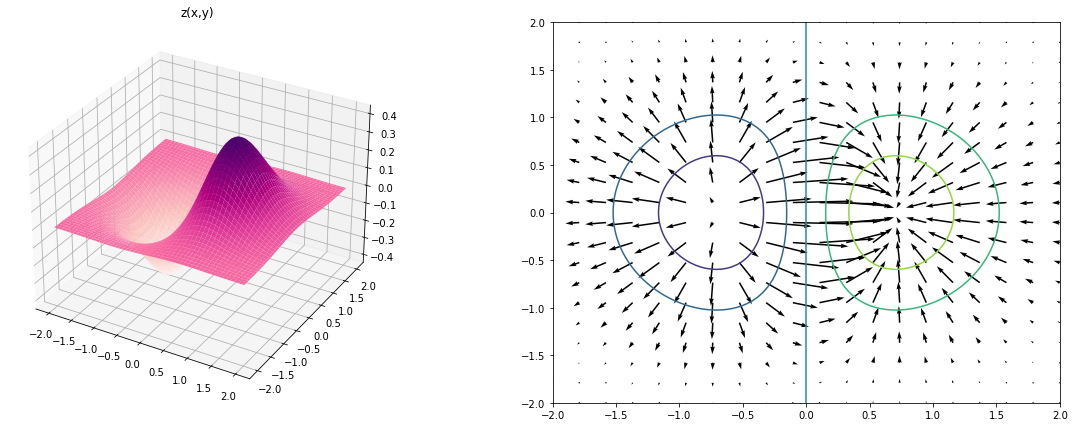

In [10]:
X, Y = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
z_np = lambdify((x, y), z)
zx_np = lambdify((x, y), z_x)
zy_np = lambdify((x, y), z_y)

fig = plt.figure(figsize=(21,7))
ax0 = fig.add_subplot(1, 2, 1, projection='3d')
ax1 = fig.add_subplot(1, 2, 2)

ax0.plot_surface(X, Y, z_np(X, Y), cmap='RdPu')
ax0.set_title('z(x,y)')

ax1.contour(X, Y, z_np(X, Y))

X, Y = np.meshgrid(np.linspace(-2,2,20), np.linspace(-2,2,20))
ax1.quiver(X, Y, zx_np(X, Y), zy_np(X, Y))

plt.show()

### Parciales de orden superior

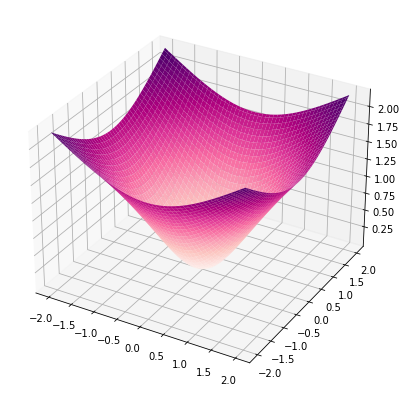

In [11]:
x, y = symbols('x, y')

f = log(x**2 + y**2 + 1)

X, Y = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
z_np = lambdify((x, y), f)

fig = plt.figure(figsize=(7,7))
ax0 = fig.add_subplot(1, 1, 1, projection='3d')

ax0.plot_surface(X, Y, z_np(X, Y), cmap='RdPu')
plt.show()



Derivadas parciales

In [12]:
fx=diff(f, x)
fy=diff(f, y)
fyy=diff(f, y, 2) 
fxx=diff(f, x, 2)
fxy=diff(diff(f, y), x)
fyx=diff(diff(f, x), y)

Definicion campo de gradientes y hessiana

In [13]:
G1 = Matrix([fx,fy])
print('Gradiente')
display(G1)
H1 = Matrix([[fxx, fxy],[fyx, fyy]])
print('Hesiana')
display(H1)

Gradiente


Matrix([
[2*x/(x**2 + y**2 + 1)],
[2*y/(x**2 + y**2 + 1)]])

Hesiana


Matrix([
[2*(-2*x**2/(x**2 + y**2 + 1) + 1)/(x**2 + y**2 + 1),                         -4*x*y/(x**2 + y**2 + 1)**2],
[                        -4*x*y/(x**2 + y**2 + 1)**2, 2*(-2*y**2/(x**2 + y**2 + 1) + 1)/(x**2 + y**2 + 1)]])

In [14]:
# Alternativas usando el jacobiano
G2 = Matrix([f]).jacobian([x,y]).T
print('Gradiente')
display(G2)
H2 = G2.jacobian([x,y])
print('Hesiana')
display(H2)

Gradiente


Matrix([
[2*x/(x**2 + y**2 + 1)],
[2*y/(x**2 + y**2 + 1)]])

Hesiana


Matrix([
[-4*x**2/(x**2 + y**2 + 1)**2 + 2/(x**2 + y**2 + 1),                        -4*x*y/(x**2 + y**2 + 1)**2],
[                       -4*x*y/(x**2 + y**2 + 1)**2, -4*y**2/(x**2 + y**2 + 1)**2 + 2/(x**2 + y**2 + 1)]])

### Calculo norma y determinante 

In [15]:
norma = G1.norm() # campo escalar de la norma del gradiente
norma

sqrt(4*Abs(x/(x**2 + y**2 + 1))**2 + 4*Abs(y/(x**2 + y**2 + 1))**2)

In [16]:
determinante = fxx*fyy-fxy**2 # campo escalar del determinante de la hessiana
determinante

-16*x**2*y**2/(x**2 + y**2 + 1)**4 + 4*(-2*x**2/(x**2 + y**2 + 1) + 1)*(-2*y**2/(x**2 + y**2 + 1) + 1)/(x**2 + y**2 + 1)**2

Dibujar norma del gradiente y determinante de la hessiana

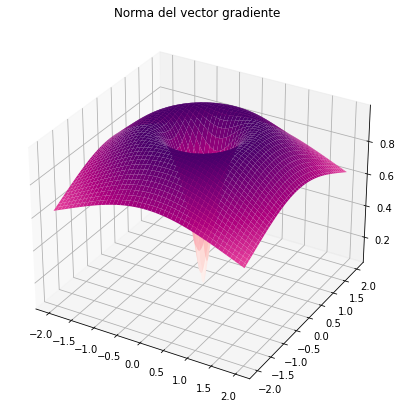

In [17]:
X, Y = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
norma_np = lambdify((x, y), norma)

fig = plt.figure(figsize=(7,7))
ax0 = fig.add_subplot(1, 1, 1, projection='3d')
ax0.set_title('Norma del vector gradiente')
ax0.plot_surface(X, Y, norma_np(X, Y), cmap='RdPu')
plt.show()

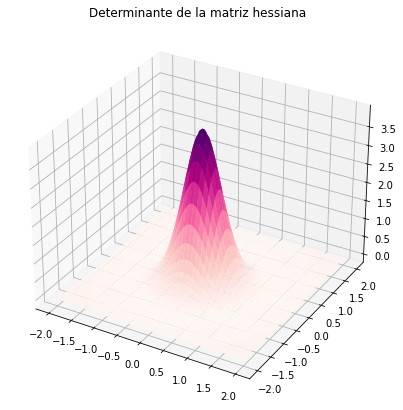

In [25]:
X, Y = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
determinante_np = lambdify((x, y), determinante)

fig = plt.figure(figsize=(7,7))
ax0 = fig.add_subplot(1, 1, 1, projection='3d')
ax0.set_title('Determinante de la matriz hessiana')
ax0.plot_surface(X, Y, determinante_np(X, Y), cmap='RdPu')
plt.show()

Clasificación

In [19]:
x, y = symbols('x, y')

f = log(x**2 + y**2 + 1)

fx = diff(f,x) 
fy = diff(f,y)

xcr = solve(fx)
ycr = solve(fy)
print('Puntos críticos')
display(xcr, ycr)

Puntos críticos


[{x: 0}]

[{y: 0}]

Calculo derivadas parciales segundas y determinante de la Hessiana

In [20]:
fxx = diff(fx,x) 
fxy = diff(fx,y) # fyx=fxy
fyy = diff(fy,y)
D = fxx*fyy - fxy**2

G1 = Matrix([f]).jacobian([x,y]).T
print('Gradiente')
display(G1)
H1 = G1.jacobian([x,y])
print('Hesiana')
display(H1)


Gradiente


Matrix([
[2*x/(x**2 + y**2 + 1)],
[2*y/(x**2 + y**2 + 1)]])

Hesiana


Matrix([
[-4*x**2/(x**2 + y**2 + 1)**2 + 2/(x**2 + y**2 + 1),                        -4*x*y/(x**2 + y**2 + 1)**2],
[                       -4*x*y/(x**2 + y**2 + 1)**2, -4*y**2/(x**2 + y**2 + 1)**2 + 2/(x**2 + y**2 + 1)]])

Evaluo el determinante en los puntos criticos

In [21]:
M21 = D.subs({x: xcr[0][x], y: ycr[0][y]})
display(M21)
M11 = fxx.subs({x: xcr[0][x], y: ycr[0][y]})
display(M11)


4

2

In [22]:
eigvs = H1.eigenvects()
display(eigvs)

V1 = eigvs[0][2][0]
V2 = eigvs[1][2][0]
V = V1.col_insert(1, V2)
print('Autovectores de la Hessiana')
display(V)


D = Matrix([[eigvs[0][0], 0], [0, eigvs[1][0]]])
print('Autovalores de la Hessiana')
display(D)

residuo = H1*V - V*D # verifica A*V = V*D
# A.subs({x:-1, y:3}) # para cualquier valor x y
print('Residuo')
residuo

[((-2*x**2 - 2*y**2 + 2)/(x**4 + 2*x**2*y**2 + 2*x**2 + y**4 + 2*y**2 + 1),
  1,
  [Matrix([
   [x/y],
   [  1]])]),
 (2/(x**2 + y**2 + 1),
  1,
  [Matrix([
   [-y/x],
   [   1]])])]

Autovectores de la Hessiana


Matrix([
[x/y, -y/x],
[  1,    1]])

Autovalores de la Hessiana


Matrix([
[(-2*x**2 - 2*y**2 + 2)/(x**4 + 2*x**2*y**2 + 2*x**2 + y**4 + 2*y**2 + 1),                   0],
[                                                                       0, 2/(x**2 + y**2 + 1)]])

Residuo


Matrix([
[-4*x*y/(x**2 + y**2 + 1)**2 + x*(-4*x**2/(x**2 + y**2 + 1)**2 + 2/(x**2 + y**2 + 1))/y - x*(-2*x**2 - 2*y**2 + 2)/(y*(x**4 + 2*x**2*y**2 + 2*x**2 + y**4 + 2*y**2 + 1)), -4*x*y/(x**2 + y**2 + 1)**2 - y*(-4*x**2/(x**2 + y**2 + 1)**2 + 2/(x**2 + y**2 + 1))/x + 2*y/(x*(x**2 + y**2 + 1))],
[            -4*x**2/(x**2 + y**2 + 1)**2 - 4*y**2/(x**2 + y**2 + 1)**2 - (-2*x**2 - 2*y**2 + 2)/(x**4 + 2*x**2*y**2 + 2*x**2 + y**4 + 2*y**2 + 1) + 2/(x**2 + y**2 + 1),                                                                                                                  0]])

Descomposicion espectral de la Hessiana

In [23]:
x, y = symbols('x, y')
f = x**2 - y**2
G2 = Matrix([f]).jacobian([x,y]).T
print('Gradiente')
display(G2)
H2 = G2.jacobian([x,y])
print('Hesiana')
display(H2)

eigvs = H2.eigenvects()
display(eigvs)
V1 = eigvs[0][2][0]
V2 = eigvs[1][2][0]
V = V1.col_insert(1, V2)
print('Autovectores de la Hessiana')
display(V)


D = Matrix([[eigvs[0][0], 0], [0, eigvs[1][0]]])
print('Autovalores de la Hessiana')
display(D)

residuo = H2*V - V*D # verifica A*V = V*D
print('Residuo')
residuo

Gradiente


Matrix([
[ 2*x],
[-2*y]])

Hesiana


Matrix([
[2,  0],
[0, -2]])

[(-2,
  1,
  [Matrix([
   [0],
   [1]])]),
 (2,
  1,
  [Matrix([
   [1],
   [0]])])]

Autovectores de la Hessiana


Matrix([
[0, 1],
[1, 0]])

Autovalores de la Hessiana


Matrix([
[-2, 0],
[ 0, 2]])

Residuo


Matrix([
[0, 0],
[0, 0]])

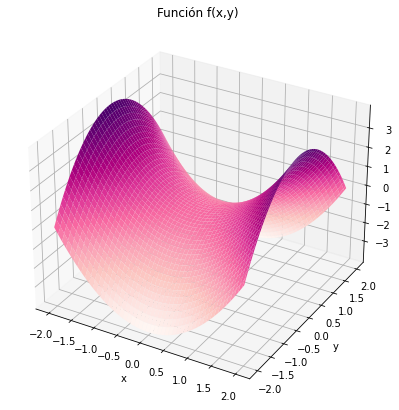

In [24]:
X, Y = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
f_np = lambdify((x, y), f)

fig = plt.figure(figsize=(7,7))
ax0 = fig.add_subplot(1, 1, 1, projection='3d')
ax0.set_title('Función f(x,y)')
ax0.set_xlabel('x')
ax0.set_ylabel('y')
ax0.plot_surface(X, Y, f_np(X, Y), cmap='RdPu')
plt.show()